# Projeto - Predict Safe FF

# 

In [1]:
import pandas as pd

# 

In [53]:
safe = pd.read_table("SAFES_V2.txt")
sf_geral = pd.read_table("SAFES_GERAL.txt")

In [54]:
safe

,Fechamento da Safe,VIVOS,EQUIPES,LMP,RLMP,MATCH_ID,FEC REG,REGVAR,FEC CIR,DIR_VER_FEC_REG,DIR_HOR_FEC_REG,DIR_VER_REG_VAR,DIR_HOR_REG_VAR,RLMP_FILTER
0,T1,47.0,12.0,Campsite,Oeste,LBFF6_280821Q1,L,SE,ID,NaN,C,S,E,NaN
1,T2,42.0,11.0,Brasília,Sudeste,LBFF6_280821Q1,C,NO,SE,C,C,N,O,NaN
2,T3,37.0,10.0,Brasília,Sudeste,LBFF6_280821Q1,C,O,E,C,C,NaN,O,NaN
3,T4,32.0,10.0,Brasília,Sudeste,LBFF6_280821Q1,C,NE,SD,C,C,N,E,NaN
4,T5,22.0,7.0,Brasília,Sudeste,LBFF6_280821Q1,C,NE,SD,C,C,N,E,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,T3,NaN,NaN,Posto,Nordeste,LBFFB7_230422Q5,C,SO,IE,C,C,S,O,NaN
3001,T3,NaN,NaN,Bimasaki,Sudoeste,LBFFB7_230422Q6,C,NE,SD,C,C,N,E,NaN
3002,T3,NaN,NaN,Moathouse,Sudeste,LBFFB7_230422Q7,NE,SE,ID,N,E,S,E,NaN
3003,T3,NaN,NaN,Refinaria,Sudeste,LBFFB7_230422Q8,C,NE,SD,C,C,N,E,NaN


In [55]:
safe.columns

Index(['Fechamento da Safe', 'VIVOS', 'EQUIPES', 'LMP', 'RLMP', 'MATCH_ID',
       'FEC REG', 'REGVAR', 'FEC CIR', 'DIR_VER_FEC_REG', 'DIR_HOR_FEC_REG',
       'DIR_VER_REG_VAR', 'DIR_HOR_REG_VAR', 'RLMP_FILTER'],
      dtype='object')

In [56]:
safe.columns = ['SAFE','VIVOS','EQUIPES','LMP','RLMP','MATCH_ID','FEC_REG','REG_VAR','FEC_CIR','DIR_VER_FEC_REG', 'DIR_HOR_FEC_REG',
       'DIR_VER_REG_VAR', 'DIR_HOR_REG_VAR', 'RLMP_FILTER']
safe.tail()

,SAFE,VIVOS,EQUIPES,LMP,RLMP,MATCH_ID,FEC_REG,REG_VAR,FEC_CIR,DIR_VER_FEC_REG,DIR_HOR_FEC_REG,DIR_VER_REG_VAR,DIR_HOR_REG_VAR,RLMP_FILTER
3000,T3,NaN,NaN,Posto,Nordeste,LBFFB7_230422Q5,C,SO,IE,C,C,S,O,NaN
3001,T3,NaN,NaN,Bimasaki,Sudoeste,LBFFB7_230422Q6,C,NE,SD,C,C,N,E,NaN
3002,T3,NaN,NaN,Moathouse,Sudeste,LBFFB7_230422Q7,NE,SE,ID,N,E,S,E,NaN
3003,T3,NaN,NaN,Refinaria,Sudeste,LBFFB7_230422Q8,C,NE,SD,C,C,N,E,NaN
3004,T3,NaN,NaN,Clock,Sul,LBFFB7_230422Q9,SO,SO,IE,S,O,S,O,NaN


In [57]:
safe.REG_VAR.value_counts()

NO    664
SE    595
SO    554
NE    531
C     439
S      62
O      60
L      54
N      46
Name: REG_VAR, dtype: int64

In [58]:
safe.FEC_REG.value_counts()

C     1325
L      365
S      342
O      265
N      258
SE     144
NE     141
SO      96
NO      69
Name: FEC_REG, dtype: int64

In [59]:
safe.RLMP.value_counts().head(15)

Centro                567
Norte                 458
Leste                 319
Oeste                 310
Sul                   269
Nordeste              194
Sudeste               160
Sudoeste              115
Noroeste               76
Centro Noroeste        21
Centro Sudoeste         8
No Aberto ao Oeste      5
Galpão Central          4
Outdoor                 4
Escola                  4
Name: RLMP, dtype: int64

In [60]:
features = ['SAFE','MATCH_ID', 'LMP', 'FEC_REG', 'REG_VAR', 'DIR_VER_REG_VAR', 'DIR_HOR_REG_VAR', 'RLMP']

In [61]:
safe = safe.loc[:,features].pivot(columns='SAFE',index='MATCH_ID').reset_index()

In [62]:
safe

MATCH_ID         LMP                                      \
SAFE                          T1          T2          T3          T4   
0     LBBF4_130221Q1      Marble        Golf        Golf        Golf   
1     LBBF4_130221Q2   Refinaria      Ruínas      Ruínas      Ruínas   
2     LBBF4_130221Q3        Peak        Peak        Peak        Peak   
3     LBBF4_130221Q4      Fields      Fields      Fields      Fields   
4     LBBF4_130221Q5  Playground      Prisão      Prisão      Prisão   
..               ...         ...         ...         ...         ...   
728     LBFF_60920Q2       Posto       Posto   Refinaria   Refinaria   
729     LBFF_60920Q3       Pochi     Sentosa     Sentosa     Sentosa   
730     LBFF_60920Q4    Brasília      Fields      Fields      Fields   
731     LBFF_60920Q5  Playground  Playground  Playground  Playground   
732     LBFF_60920Q6    Bimasaki    Bimasaki    Bimasaki       Clock   

                      FEC_REG          ... DIR_HOR_REG_VAR             \
SAFE          T5   T6      T1  T2  T3  ...              T3 T4 T5   T6   
0           Golf  NaN       O   S   C  ...               E  O  O  NaN   
1         Ruínas  NaN       C  NO  NO  ...               O  O  E  NaN   
2       Bimasaki  NaN       C   C   C  ...               C  O  O  NaN   
3         Fields  NaN       N   C   C  ...               O  O  E  NaN   
4         Prisão  NaN       C  NE   L  ...               O  E  O  NaN   
..           ...  ...     ...  ..  ..  ...             ... .. ..  ...   
728        Posto  NaN      SE   C   C  ...               O  E  E  NaN   
729         Mars  NaN      SE  SE  SE  ...               O  C  O  NaN   
730       Fields  NaN      NO  NO  NO  ...               E  O  O  NaN   
731   Playground  NaN       N   N   N  ...               C  O  E  NaN   
732         Peak  NaN       C   C   C  ...               E  O  E  NaN   

                         RLMP                              \
SAFE                       T1                          T2   
0                     Sudeste                       Leste   
1                       Norte                      Centro   
2                      Centro                      Centro   
3                       Oeste                      Centro   
4                      Centro                       Oeste   
..                        ...                         ...   
728           Aberto ao Lerte          Subida ao Noroeste   
729   Casa do Upador ao Leste                         NaN   
730     Palafitas ao Noroeste              Costa ao Oeste   
731        No Aberto ao Oeste          No Aberto ao Oeste   
732          Guarita ao Norte  Próximo a Casa L Solitária   

                                                                  \
SAFE                              T3                          T4   
0                           Nordeste                    Nordeste   
1                             Centro                      Centro   
2                             Centro                      Centro   
3                             Centro                      Centro   
4                              Oeste                       Oeste   
..                               ...                         ...   
728                              NaN                         NaN   
729                              NaN         Mar próximo a costa   
730   Acima da Guarita perto do Muro                         NaN   
731               No Aberto ao Oeste          No Aberto ao Oeste   
732                            Posto  Entre as Guaritas ao Leste   

                                                              
SAFE                                                 T5   T6  
0                                              Nordeste  NaN  
1                                                Centro  NaN  
2                                                 Leste  NaN  
3                                                Centro  NaN  
4                                                 Oeste  NaN  
..   

In [63]:
safe.columns = ['_'.join(col) for col in safe.columns]
safe

,MATCH_ID_,LMP_T1,LMP_T2,LMP_T3,LMP_T4,LMP_T5,LMP_T6,FEC_REG_T1,FEC_REG_T2,FEC_REG_T3,...,DIR_HOR_REG_VAR_T3,DIR_HOR_REG_VAR_T4,DIR_HOR_REG_VAR_T5,DIR_HOR_REG_VAR_T6,RLMP_T1,RLMP_T2,RLMP_T3,RLMP_T4,RLMP_T5,RLMP_T6
0,LBBF4_130221Q1,Marble,Golf,Golf,Golf,Golf,NaN,O,S,C,...,E,O,O,NaN,Sudeste,Leste,Nordeste,Nordeste,Nordeste,NaN
1,LBBF4_130221Q2,Refinaria,Ruínas,Ruínas,Ruínas,Ruínas,NaN,C,NO,NO,...,O,O,E,NaN,Norte,Centro,Centro,Centro,Centro,NaN
2,LBBF4_130221Q3,Peak,Peak,Peak,Peak,Bimasaki,NaN,C,C,C,...,C,O,O,NaN,Centro,Centro,Centro,Centro,Leste,NaN
3,LBBF4_130221Q4,Fields,Fields,Fields,Fields,Fields,NaN,N,C,C,...,O,O,E,NaN,Oeste,Centro,Centro,Centro,Centro,NaN
4,LBBF4_130221Q5,Playground,Prisão,Prisão,Prisão,Prisão,NaN,C,NE,L,...,O,E,O,NaN,Centro,Oeste,Oeste,Oeste,Oeste,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,LBFF_60920Q2,Posto,Posto,Refinaria,Refinaria,Posto,NaN,SE,C,C,...,O,E,E,NaN,Aberto ao Lerte,Subida ao Noroeste,NaN,NaN,NaN,NaN
729,LBFF_60920Q3,Pochi,Sentosa,Sentosa,Sentosa,Mars,NaN,SE,SE,SE,...,O,C,O,NaN,Casa do Upador ao Leste,NaN,NaN,Mar próximo a costa,Na Costa ao Nordeste,NaN
730,LBFF_60920Q4,Brasília,Fields,Fields,Fields,Fields,NaN,NO,NO,NO,...,E,O,O,NaN,Palafitas ao Noroeste,Costa ao Oeste,Acima da Guarita perto do Muro,NaN,Próximo a Casa do Upador a Oeste,NaN
731,LBFF_60920Q5,Playground,Playground,Playground,Playground,Playground,NaN,N,N,N,...,C,O,E,NaN,No Aberto ao Oeste,No Aberto ao Oeste,No Aberto ao Oeste,No Aberto ao Oeste,No Aberto ao Oeste,NaN


In [64]:
safe.rename(columns = {'MATCH_ID_' : 'MATCH_ID'}, inplace = True)

In [65]:
sf_geral.DATA = pd.to_datetime(sf_geral.DATA)

In [66]:
sf_geral.DATA[0]

Timestamp('2021-08-28 00:00:00')

In [71]:
sf_geral = sf_geral.query('DATA >= "2021-01-01"')
sf_geral = sf_geral.reset_index(drop=True)

In [74]:
[sf_geral.DATA[x] for x in sf_geral.DATA]

KeyError: Timestamp('2021-08-28 00:00:00')

In [75]:
sf_geral = sf_geral.loc[:,['MAPA','MATCH_ID']]

In [76]:
SAFE = pd.merge(sf_geral,safe,on="MATCH_ID")
SAFE

,MAPA,MATCH_ID,LMP_T1,LMP_T2,LMP_T3,LMP_T4,LMP_T5,LMP_T6,FEC_REG_T1,FEC_REG_T2,...,DIR_HOR_REG_VAR_T3,DIR_HOR_REG_VAR_T4,DIR_HOR_REG_VAR_T5,DIR_HOR_REG_VAR_T6,RLMP_T1,RLMP_T2,RLMP_T3,RLMP_T4,RLMP_T5,RLMP_T6
0,Purgatório,LBFF6_280821Q1,Campsite,Brasília,Brasília,Brasília,Brasília,NaN,L,C,...,O,E,E,NaN,Oeste,Sudeste,Sudeste,Sudeste,Sudeste,NaN
1,Kalahari,LBFF6_280821Q2,Refinaria,Refinaria,Refinaria,Refinaria,Refinaria,NaN,N,N,...,E,E,C,NaN,Norte,Norte,Norte,Norte,Norte,NaN
2,Bermuda,LBFF6_280821Q3,Peak,Peak,Peak,Bimasaki,Bimasaki,NaN,L,C,...,O,O,C,NaN,Nordeste,Centro,Noroeste,Leste,Leste,NaN
3,Purgatório,LBFF6_280821Q4,Brasília,Brasília,Brasília,Brasília,Brasília,NaN,C,C,...,E,O,E,NaN,Norte,Norte,Norte,Norte,Norte,NaN
4,Kalahari,LBFF6_280821Q5,Refinaria,Playground,Refinaria,Refinaria,Refinaria,NaN,C,C,...,O,E,O,NaN,Norte,Sudoeste,Centro,Leste,Leste,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,Kalahari,LBFFB7_230422Q5,NaN,NaN,Posto,NaN,NaN,NaN,NaN,NaN,...,O,NaN,NaN,NaN,NaN,NaN,Nordeste,NaN,NaN,NaN
624,Bermuda,LBFFB7_230422Q6,NaN,NaN,Bimasaki,NaN,NaN,NaN,NaN,NaN,...,E,NaN,NaN,NaN,NaN,NaN,Sudoeste,NaN,NaN,NaN
625,Purgatório,LBFFB7_230422Q7,NaN,NaN,Moathouse,NaN,NaN,NaN,NaN,NaN,...,E,NaN,NaN,NaN,NaN,NaN,Sudeste,NaN,NaN,NaN
626,Kalahari,LBFFB7_230422Q8,NaN,NaN,Refinaria,NaN,NaN,NaN,NaN,NaN,...,E,NaN,NaN,NaN,NaN,NaN,Sudeste,NaN,NaN,NaN


In [77]:
SAFE.to_csv("SAFEPREDICT.csv",sep=";",index=False)

from google.colab import files
files.download("SAFEPREDICT.csv")

ModuleNotFoundError: No module named 'google'

In [78]:
BCP = SAFE

# 

## Prever o Fechamento da 3 safe dado variáveis anteriores

In [30]:
#!pip install category_encoders

In [79]:
from category_encoders import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [80]:
#SAFE = pd.read_csv("SAFEPREDICT.csv",sep=";")
SAFE.columns

Index(['MAPA', 'MATCH_ID', 'LMP_T1', 'LMP_T2', 'LMP_T3', 'LMP_T4', 'LMP_T5',
       'LMP_T6', 'FEC_REG_T1', 'FEC_REG_T2', 'FEC_REG_T3', 'FEC_REG_T4',
       'FEC_REG_T5', 'FEC_REG_T6', 'REG_VAR_T1', 'REG_VAR_T2', 'REG_VAR_T3',
       'REG_VAR_T4', 'REG_VAR_T5', 'REG_VAR_T6', 'DIR_VER_REG_VAR_T1',
       'DIR_VER_REG_VAR_T2', 'DIR_VER_REG_VAR_T3', 'DIR_VER_REG_VAR_T4',
       'DIR_VER_REG_VAR_T5', 'DIR_VER_REG_VAR_T6', 'DIR_HOR_REG_VAR_T1',
       'DIR_HOR_REG_VAR_T2', 'DIR_HOR_REG_VAR_T3', 'DIR_HOR_REG_VAR_T4',
       'DIR_HOR_REG_VAR_T5', 'DIR_HOR_REG_VAR_T6', 'RLMP_T1', 'RLMP_T2',
       'RLMP_T3', 'RLMP_T4', 'RLMP_T5', 'RLMP_T6'],
      dtype='object')

Quais são as features de interesse ?
Label - REG_VAR_T3
Features - 'MAPA', 'VIVOS_T2', 'LMP_T1', 'LMP_T2', 'REG_VAR_T1', 'REG_VAR_T2', 'FEC_REG_T1', 'FEC_REG_T2'

* Descartar algum tipo de modalidade/observações que tiverem muitas info com "?"
*Algo que a gente poder fazer é em vez de ter uma feature para S/I/C + E/D/C separar em duas

In [81]:
SAFE = SAFE.loc[:,['MAPA',  'REG_VAR_T3', 'REG_VAR_T2', 'REG_VAR_T1','LMP_T1','LMP_T2','FEC_REG_T1', 'FEC_REG_T2','RLMP_T1','RLMP_T2']]
                   #'FEC_REG_T1', 'FEC_REG_T2', 'DIR_VER_REG_VAR_T1', 'DIR_VER_REG_VAR_T2','DIR_HOR_REG_VAR_T1', 'DIR_HOR_REG_VAR_T2']]
SAFE

,MAPA,REG_VAR_T3,REG_VAR_T2,REG_VAR_T1,LMP_T1,LMP_T2,FEC_REG_T1,FEC_REG_T2,RLMP_T1,RLMP_T2
0,Purgatório,O,NO,SE,Campsite,Brasília,L,C,Oeste,Sudeste
1,Kalahari,NE,L,NO,Refinaria,Refinaria,N,N,Norte,Norte
2,Bermuda,NO,SO,NE,Peak,Peak,L,C,Nordeste,Centro
3,Purgatório,NE,NE,SO,Brasília,Brasília,C,C,Norte,Norte
4,Kalahari,SO,SE,NO,Refinaria,Playground,C,C,Norte,Sudoeste
...,...,...,...,...,...,...,...,...,...,...
623,Kalahari,SO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
624,Bermuda,NE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
625,Purgatório,SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
626,Kalahari,NE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
#Excluindo dados nulos
SAFE = SAFE.dropna()
SAFE

,MAPA,REG_VAR_T3,REG_VAR_T2,REG_VAR_T1,LMP_T1,LMP_T2,FEC_REG_T1,FEC_REG_T2,RLMP_T1,RLMP_T2
0,Purgatório,O,NO,SE,Campsite,Brasília,L,C,Oeste,Sudeste
1,Kalahari,NE,L,NO,Refinaria,Refinaria,N,N,Norte,Norte
2,Bermuda,NO,SO,NE,Peak,Peak,L,C,Nordeste,Centro
3,Purgatório,NE,NE,SO,Brasília,Brasília,C,C,Norte,Norte
4,Kalahari,SO,SE,NO,Refinaria,Playground,C,C,Norte,Sudoeste
...,...,...,...,...,...,...,...,...,...,...
462,Kalahari,NO,SO,SE,Posto,Submarino,C,S,Centro,Norte
463,Bermuda,SE,NO,NE,Mill,Mill,NE,NE,Sudeste,Sul
464,Purgatório,NE,NE,SE,Campsite,Campsite,L,L,Norte,Norte
465,Kalahari,SO,SO,SE,Porto,Posto,L,L,Oeste,Leste


In [83]:
#Transformar as variáveis categóricas em dummies
#Aplicando one hot encoder na variável genre
enc = OneHotEncoder(cols=['MAPA'],use_cat_names=True).fit(SAFE.MAPA)

#Adicionando one hot ao dataframe base
SAFE = pd.concat([SAFE,enc.transform(SAFE.MAPA)],axis='columns')

#Removendo colunas
SAFE.drop(columns='MAPA',inplace=True)

In [84]:
enc = OneHotEncoder(cols=['LMP_T1'],use_cat_names=True).fit(SAFE.LMP_T1)
SAFE = pd.concat([SAFE,enc.transform(SAFE.LMP_T1)],axis='columns')
SAFE.drop(columns='LMP_T1',inplace=True)

enc = OneHotEncoder(cols=['LMP_T2'],use_cat_names=True).fit(SAFE.LMP_T2)
SAFE = pd.concat([SAFE,enc.transform(SAFE.LMP_T2)],axis='columns')
SAFE.drop(columns='LMP_T2',inplace=True)

enc = OneHotEncoder(cols=['REG_VAR_T1'],use_cat_names=True).fit(SAFE.REG_VAR_T1)
SAFE = pd.concat([SAFE,enc.transform(SAFE.REG_VAR_T1)],axis='columns')
SAFE.drop(columns='REG_VAR_T1',inplace=True)

enc = OneHotEncoder(cols=['REG_VAR_T2'],use_cat_names=True).fit(SAFE.REG_VAR_T2)
SAFE = pd.concat([SAFE,enc.transform(SAFE.REG_VAR_T2)],axis='columns')
SAFE.drop(columns='REG_VAR_T2',inplace=True)

enc = OneHotEncoder(cols=['FEC_REG_T1'],use_cat_names=True).fit(SAFE.FEC_REG_T1)
SAFE = pd.concat([SAFE,enc.transform(SAFE.FEC_REG_T1)],axis='columns')
SAFE.drop(columns='FEC_REG_T1',inplace=True)

enc = OneHotEncoder(cols=['FEC_REG_T2'],use_cat_names=True).fit(SAFE.FEC_REG_T2)
SAFE = pd.concat([SAFE,enc.transform(SAFE.FEC_REG_T2)],axis='columns')
SAFE.drop(columns='FEC_REG_T2',inplace=True)

enc = OneHotEncoder(cols=['RLMP_T1'],use_cat_names=True).fit(SAFE.RLMP_T1)
SAFE = pd.concat([SAFE,enc.transform(SAFE.RLMP_T1)],axis='columns')
SAFE.drop(columns='RLMP_T1',inplace=True)

enc = OneHotEncoder(cols=['RLMP_T2'],use_cat_names=True).fit(SAFE.RLMP_T2)
SAFE = pd.concat([SAFE,enc.transform(SAFE.RLMP_T2)],axis='columns')
SAFE.drop(columns='RLMP_T2',inplace=True)



##########################

#enc = OneHotEncoder(cols=['DIR_VER_REG_VAR_T1'],use_cat_names=True).fit(SAFE.DIR_VER_REG_VAR_T1)
#SAFE = pd.concat([SAFE,enc.transform(SAFE.DIR_VER_REG_VAR_T1)],axis='columns')
#SAFE.drop(columns='DIR_VER_REG_VAR_T1',inplace=True)

#enc = OneHotEncoder(cols=['DIR_HOR_REG_VAR_T1'],use_cat_names=True).fit(SAFE.DIR_HOR_REG_VAR_T1)
#SAFE = pd.concat([SAFE,enc.transform(SAFE.DIR_HOR_REG_VAR_T1)],axis='columns')
#SAFE.drop(columns='DIR_HOR_REG_VAR_T1',inplace=True)

#enc = OneHotEncoder(cols=['DIR_HOR_REG_VAR_T2'],use_cat_names=True).fit(SAFE.DIR_HOR_REG_VAR_T2)
#SAFE = pd.concat([SAFE,enc.transform(SAFE.DIR_HOR_REG_VAR_T2)],axis='columns')
#SAFE.drop(columns='DIR_HOR_REG_VAR_T2',inplace=True)

#enc = OneHotEncoder(cols=['DIR_VER_REG_VAR_T2'],use_cat_names=True).fit(SAFE.DIR_VER_REG_VAR_T2)
#SAFE = pd.concat([SAFE,enc.transform(SAFE.DIR_VER_REG_VAR_T2)],axis='columns')
#SAFE.drop(columns='DIR_VER_REG_VAR_T2',inplace=True)

In [85]:
SAFE

,REG_VAR_T3,MAPA_Purgatório,MAPA_Kalahari,MAPA_Bermuda,LMP_T1_Campsite,LMP_T1_Refinaria,LMP_T1_Peak,LMP_T1_Brasília,LMP_T1_Factory,LMP_T1_Fields,...,RLMP_T2_Centro,RLMP_T2_Sudoeste,RLMP_T2_Oeste,RLMP_T2_Leste,RLMP_T2_Noroeste,RLMP_T2_Nordeste,RLMP_T2_Sul,RLMP_T2_Centro Noroeste,RLMP_T2_Centro Sudoeste,RLMP_T2_Cento
0,O,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NE,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NO,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,NE,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SO,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,NO,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
463,SE,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
464,NE,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
465,SO,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0



#Amostragem
xtr, xts, ytr, yts = train_test_split(df.iloc[:,:-1],df.iloc[:,-1], train_size=0.6, random_state=0)

print("Proporção da classe 1 nos dados de Treino e Teste, respectivamente: {:.2f}%, {:.2f}%".format(ytr.value_counts()[1]/ytr.value_counts().sum()*100,
                                                                                            yts.value_counts()[1]/yts.value_counts().sum()*100))

lgr = LogisticRegression(random_state=0, class_weight='balanced',n_jobs=-1)
#utilizando class_weight para colocar pesos nas métricas de avaliação com finalidade de equalizar os tipos de classes

lgr.fit(xtr,ytr)

lgr.score(xtr,ytr)

lgr.coef_

In [94]:
#Amostragem
xtr, xts, ytr, yts = train_test_split(SAFE.iloc[:,:].drop(columns='REG_VAR_T3'),SAFE.loc[:,['REG_VAR_T3']], train_size=0.7, random_state=0)

In [95]:
lgr = LogisticRegression(random_state=0, class_weight='balanced',n_jobs=-1)

In [96]:
lgr.fit(xtr,ytr)

C:\Users\pedro\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(class_weight='balanced', n_jobs=-1, random_state=0)

In [97]:
lgr.score(xtr,ytr)

0.5306748466257669

In [98]:
xtr.columns.tolist()

['MAPA_Purgatório',
 'MAPA_Kalahari',
 'MAPA_Bermuda',
 'LMP_T1_Campsite',
 'LMP_T1_Refinaria',
 'LMP_T1_Peak',
 'LMP_T1_Brasília',
 'LMP_T1_Factory',
 'LMP_T1_Fields',
 'LMP_T1_Playground',
 'LMP_T1_Bimasaki',
 'LMP_T1_Posto',
 'LMP_T1_Kota',
 'LMP_T1_Golf',
 'LMP_T1_Clock',
 'LMP_T1_Forge',
 'LMP_T1_Pochi',
 'LMP_T1_Hangar',
 'LMP_T1_Marble',
 'LMP_T1_Porto',
 'LMP_T1_Riverside',
 'LMP_T1_Ruínas',
 'LMP_T1_Cemitério',
 'LMP_T1_Mill',
 'LMP_T1_Crossroads',
 'LMP_T1_Katu',
 'LMP_T1_Plantation',
 'LMP_T1_Prisão',
 'LMP_T1_Moathouse',
 'LMP_T1_Mars',
 'LMP_T1_Santuário',
 'LMP_T2_Brasília',
 'LMP_T2_Refinaria',
 'LMP_T2_Peak',
 'LMP_T2_Playground',
 'LMP_T2_Factory',
 'LMP_T2_Fields',
 'LMP_T2_Bimasaki',
 'LMP_T2_Posto',
 'LMP_T2_Clock',
 'LMP_T2_Kota',
 'LMP_T2_Marble',
 'LMP_T2_Campsite',
 'LMP_T2_Pochi',
 'LMP_T2_Cape',
 'LMP_T2_Ruínas',
 'LMP_T2_Moathouse',
 'LMP_T2_Mars',
 'LMP_T2_Pedra',
 'LMP_T2_Golf',
 'LMP_T2_Submarino',
 'LMP_T2_Riverside',
 'LMP_T2_Santuário',
 'LMP_T2_Central

In [99]:
ytr.REG_VAR_T3.value_counts()

NO    77
SE    63
NE    62
SO    62
C     46
L      5
S      4
N      4
O      3
Name: REG_VAR_T3, dtype: int64

In [100]:
lgr.classes_

array(['C', 'L', 'N', 'NE', 'NO', 'O', 'S', 'SE', 'SO'], dtype=object)

In [106]:
lgr.coef_.tolist()[0][0:3]
#coeficientes dos mapas da safe "C"

[-0.13388928213129864, 0.28827488487194025, -0.15439965071475265]

In [107]:
xtr

,MAPA_Purgatório,MAPA_Kalahari,MAPA_Bermuda,LMP_T1_Campsite,LMP_T1_Refinaria,LMP_T1_Peak,LMP_T1_Brasília,LMP_T1_Factory,LMP_T1_Fields,LMP_T1_Playground,...,RLMP_T2_Centro,RLMP_T2_Sudoeste,RLMP_T2_Oeste,RLMP_T2_Leste,RLMP_T2_Noroeste,RLMP_T2_Nordeste,RLMP_T2_Sul,RLMP_T2_Centro Noroeste,RLMP_T2_Centro Sudoeste,RLMP_T2_Cento
157,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
363,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
219,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
455,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
191,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
192,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
117,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
47,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [112]:
x = 324
print(lgr.predict(xtr.values[x].reshape(1,-1))[0])
print(ytr.iloc[x].values)
xxx = pd.DataFrame({'Cenário' : SAFE.iloc[:,1:].columns.tolist(), 'Bin' : xtr.values[x].tolist()})
print(xxx.loc[xxx['Bin'] > 0])
predict = pd.DataFrame({'Fechamento Regional' : lgr.classes_.tolist(), 'Probabilidade (%)': lgr.predict_proba(xtr.values[x].reshape(1,-1))[0]*100})
predict.sort_values(by='Probabilidade (%)',ascending=False)

SO
['SO']
              Cenário  Bin
2        MAPA_Bermuda    1
17      LMP_T1_Hangar    1
37    LMP_T2_Bimasaki    1
70      REG_VAR_T1_SO    1
79      REG_VAR_T2_NE    1
89       FEC_REG_T1_O    1
94       FEC_REG_T2_C    1
105  RLMP_T1_Nordeste    1
119     RLMP_T2_Oeste    1


,Fechamento Regional,Probabilidade (%)
8,SO,43.339637
4,NO,18.271110
3,NE,13.795435
7,SE,11.927834
0,C,7.437083
2,N,4.061939
5,O,1.034489
1,L,0.115423
6,S,0.017050


In [113]:
lgr.score(xts,yts)

0.09219858156028368

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [115]:
#https://medium.com/@alegeorgelustosa/m%C3%A9todos-para-selecionar-as-melhores-vari%C3%A1veis-do-dataset-em-python-2c374b2e9df2

from sklearn.feature_selection import mutual_info_classif

X, y = SAFE.iloc[:,:].drop(columns='REG_VAR_T3').values,SAFE.loc[:,['REG_VAR_T3']].values

mi = mutual_info_classif(X,y)

C:\Users\pedro\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


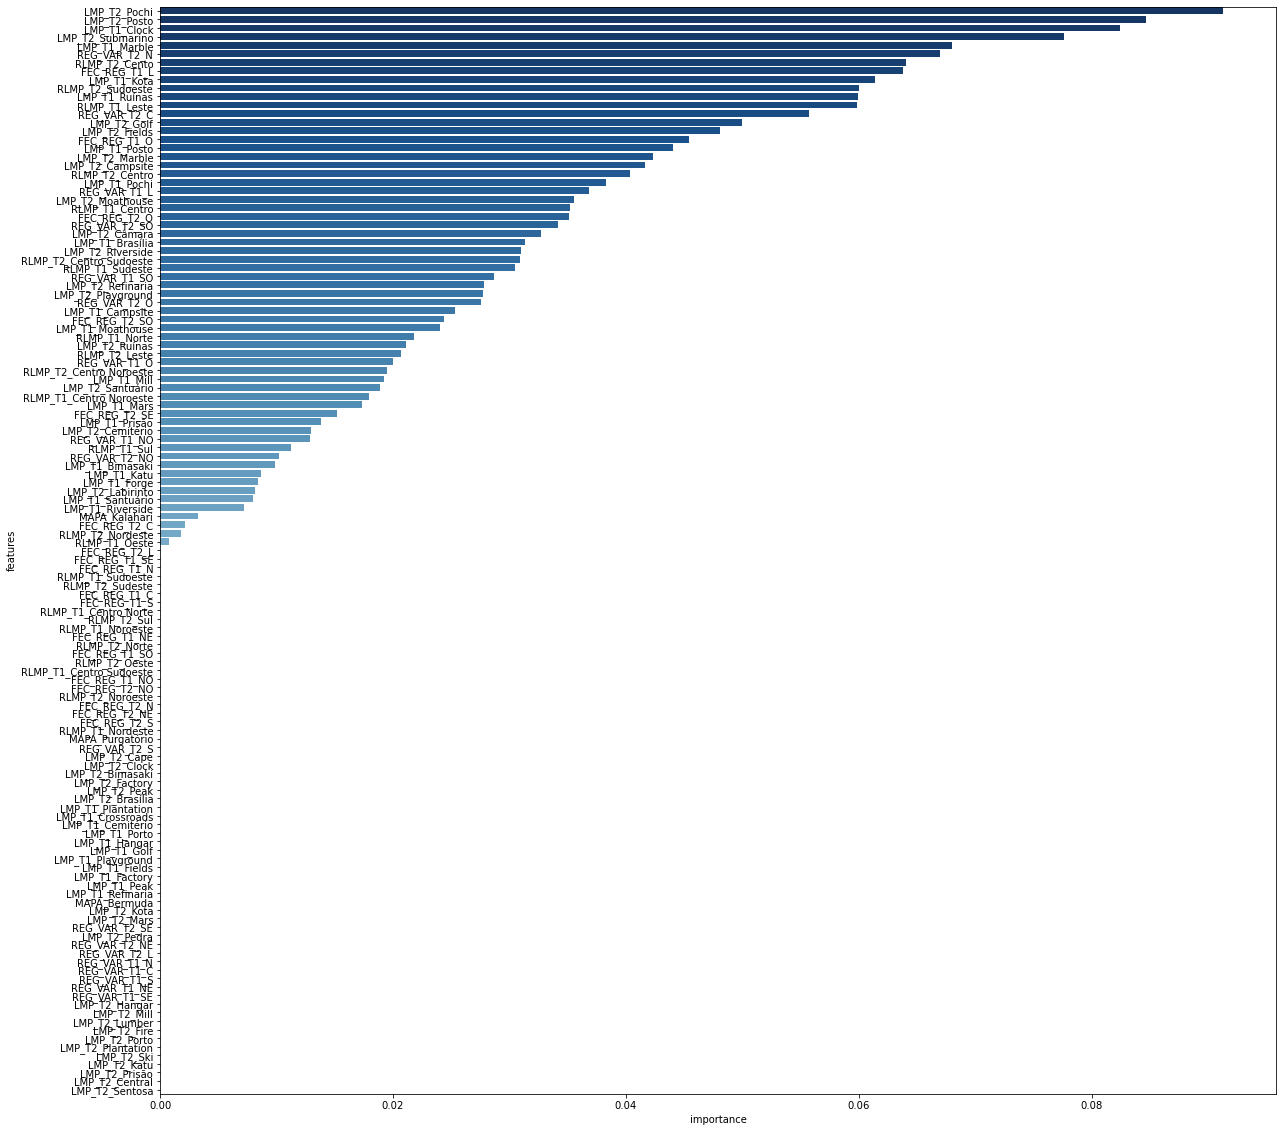

In [116]:
feat = pd.DataFrame({'features':SAFE.iloc[:,:].drop(columns='REG_VAR_T3').columns.tolist(),'importance':mi.tolist()}).sort_values(by='importance',ascending=False).reset_index()

fig, ax = plt.subplots(figsize=(20,20))

sns.barplot(y=feat.features, x=feat.importance, orient='h', palette="Blues_r")

plt.show()

In [119]:
feat.head(20)

,index,features,importance
0,43,LMP_T2_Pochi,0.091291
1,38,LMP_T2_Posto,0.084655
2,14,LMP_T1_Clock,0.082461
3,50,LMP_T2_Submarino,0.077653
4,18,LMP_T1_Marble,0.068015
5,84,REG_VAR_T2_N,0.067018
6,126,RLMP_T2_Cento,0.064043
7,85,FEC_REG_T1_L,0.063805
8,12,LMP_T1_Kota,0.061387
9,118,RLMP_T2_Sudoeste,0.059993


In [124]:
features = SAFE.drop(columns='REG_VAR_T3').columns.tolist()
a = list()
b = list()

print("\n(+) | Recall\n")
for feat in range(0,len(features)):

    score = []
    
    sel = ['LMP_T2_Ski','RLMP_T2_Centro Sudoeste', features[feat]]
    
    xtr, xts, ytr, yts = train_test_split(SAFE.iloc[:,:].drop(columns='REG_VAR_T3'),SAFE.loc[:,['REG_VAR_T3']], train_size=0.7, random_state=0)

    xtr = xtr.loc[:,sel]

    lgr = LogisticRegression(random_state=0,class_weight='balanced',n_jobs=-1)
    lgr.fit(xtr,ytr)

    s = lgr.score(xtr,ytr)

    score.append(s)

    a.append(features[feat])
    b.append(np.mean(score))

df = pd.DataFrame({'Features':a, 'Score':b}) 
df.sort_values(by='Score',ascending=False)

    #print("{} | {}".format(features[feat],np.mean(score)))


(+) | Recall



C:\Users\pedro\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\pedro\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\pedro\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\pedro\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

,Features,Score
124,RLMP_T2_Centro Noroeste,0.242331
27,LMP_T1_Prisão,0.239264
125,RLMP_T2_Centro Sudoeste,0.239264
60,LMP_T2_Câmara,0.239264
111,RLMP_T1_Centro Sudoeste,0.239264
...,...,...
59,LMP_T2_Porto,0.015337
38,LMP_T2_Posto,0.015337
99,FEC_REG_T2_SE,0.015337
46,LMP_T2_Moathouse,0.015337
